# Naive Bayes

## Análise de Sentimentos

In [1]:
import nltk
import re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import cross_val_predict

**Ler arquivo de dados e conta a quantidade de linhas**

In [2]:
dataset = pd.read_csv('Tweets_Mg.csv',encoding='utf-8')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8199 entries, 0 to 8198
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 8199 non-null   int64  
 1   Created At                 8199 non-null   object 
 2   Text                       8199 non-null   object 
 3   Geo Coordinates.latitude   104 non-null    float64
 4   Geo Coordinates.longitude  104 non-null    float64
 5   User Location              5489 non-null   object 
 6   Username                   8199 non-null   object 
 7   User Screen Name           8199 non-null   object 
 8   Retweet Count              8199 non-null   int64  
 9   Classificacao              8199 non-null   object 
 10  Observação                 1 non-null      object 
 11  Unnamed: 10                0 non-null      float64
 12  Unnamed: 11                0 non-null      float64
 13  Unnamed: 12                0 non-null      float

In [4]:
# Expante o tamanho de exibição de coluna de texto
pd.set_option('display.max_colwidth', -1)
dataset.Text.head(100)

C:\Users\surze\AppData\Local\Temp\ipykernel_6460\908654461.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


0     ���⛪ @ Catedral de Santo Antônio - Governador Valadares/MG https://t.co/JSbKamIqUJ                                                         
1     � @ Governador Valadares, Minas Gerais https://t.co/B3ThIDJCSf                                                                             
2     �� @ Governador Valadares, Minas Gerais https://t.co/dPkgzVR2Qw                                                                            
3     ��� https://t.co/BnDsO34qK0                                                                                                                
4     ��� PSOL vai questionar aumento de vereadores e prefeito de BH na Justiça - Politica - Estado de Minas https://t.co/DMg7BGsek5             
                                                                   ...                                                                           
95    #noticiasdorenan Uso de depósitos judiciais pelo governo tem nova polêmica em MG: O Banco… https://t.co/kHuZpKQaj5    

**Excluir Linhas duplicadas**

In [5]:
dataset.drop_duplicates(['Text'],inplace=True)

In [6]:
dataset.count()

Unnamed: 0                   5765
Created At                   5765
Text                         5765
Geo Coordinates.latitude     104 
Geo Coordinates.longitude    104 
User Location                3851
Username                     5765
User Screen Name             5765
Retweet Count                5765
Classificacao                5765
Observação                   1   
Unnamed: 10                  0   
Unnamed: 11                  0   
Unnamed: 12                  0   
Unnamed: 13                  0   
Unnamed: 14                  0   
Unnamed: 15                  0   
Unnamed: 16                  0   
Unnamed: 17                  0   
Unnamed: 18                  0   
Unnamed: 19                  0   
Unnamed: 20                  0   
Unnamed: 21                  0   
Unnamed: 22                  0   
Unnamed: 23                  0   
Unnamed: 24                  0   
dtype: int64

**Removendo Colunas desnecessárias**

In [7]:
for i in dataset.columns.values:
    if i.startswith('Unnamed'):
        dataset.drop(i, axis=1, inplace=True)
        print ('Colunas Deletadas:', i)

Colunas Deletadas: Unnamed: 0
Colunas Deletadas: Unnamed: 10
Colunas Deletadas: Unnamed: 11
Colunas Deletadas: Unnamed: 12
Colunas Deletadas: Unnamed: 13
Colunas Deletadas: Unnamed: 14
Colunas Deletadas: Unnamed: 15
Colunas Deletadas: Unnamed: 16
Colunas Deletadas: Unnamed: 17
Colunas Deletadas: Unnamed: 18
Colunas Deletadas: Unnamed: 19
Colunas Deletadas: Unnamed: 20
Colunas Deletadas: Unnamed: 21
Colunas Deletadas: Unnamed: 22
Colunas Deletadas: Unnamed: 23
Colunas Deletadas: Unnamed: 24


In [8]:
# Visualizando as colunas do dataset
dataset.columns

Index(['Created At', 'Text', 'Geo Coordinates.latitude',
       'Geo Coordinates.longitude', 'User Location', 'Username',
       'User Screen Name', 'Retweet Count', 'Classificacao', 'Observação'],
      dtype='object')

**Distribuição das classes neutros, positivos e negativos**

<AxesSubplot:>

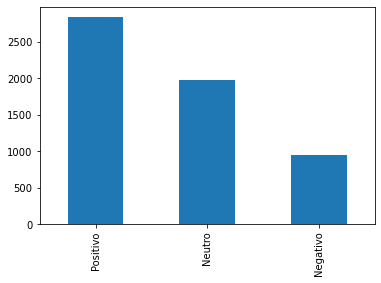

In [9]:
%matplotlib inline
dataset.Classificacao.value_counts().plot(kind='bar')

** Separando tweets e suas classes
**

In [10]:
tweets = dataset['Text']
classes = dataset['Classificacao']

**Gerando o modelo**

In [11]:
vectorizer = CountVectorizer(analyzer="word")
freq_tweets = vectorizer.fit_transform(tweets)

In [12]:
type(freq_tweets)

scipy.sparse.csr.csr_matrix

In [13]:
freq_tweets.shape

(5765, 13029)

In [14]:
freq_tweets.A

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

**Cria um modelo usando Naive Bayes Multinomial**

In [15]:
modelo = MultinomialNB()
modelo.fit(freq_tweets,classes)

MultinomialNB()

** Testando o modelo com algumas instâncias simples**

In [16]:
# defina instâncias de teste dentro de uma lista
testes = ['Esse governo está no início, vamos ver o que vai dar',
          'Estou muito feliz com o governo de Minas esse ano',
          'O estado de Minas Gerais decretou calamidade financeira!!!',
          'A segurança desse país está deixando a desejar',
          'O governador de Minas é mais uma vez do PT']

In [17]:
# Transforma os dados de teste em vetores de palavras.
freq_testes = vectorizer.transform(testes)

In [18]:
# Fazendo a classificação com o modelo treinado.
for t, c in zip (testes,modelo.predict(freq_testes)):
    print (t +", "+ c)

Esse governo está no início, vamos ver o que vai dar, Neutro
Estou muito feliz com o governo de Minas esse ano, Neutro
O estado de Minas Gerais decretou calamidade financeira!!!, Negativo
A segurança desse país está deixando a desejar, Neutro
O governador de Minas é mais uma vez do PT, Neutro


In [19]:
# Probabilidades de cada classe
print (modelo.classes_)
modelo.predict_proba(freq_testes).round(2)

['Negativo' 'Neutro' 'Positivo']


array([[0.18, 0.82, 0.  ],
       [0.02, 0.98, 0.  ],
       [0.99, 0.01, 0.  ],
       [0.1 , 0.89, 0.01],
       [0.15, 0.85, 0.  ]])

## Avaliação o modelo ##

* Usaremos a técnica de Cross Validation para avaliação dos modelos.
* Esta técnica será usada com 10 folds.

**Fazendo o cross validation do modelo**

In [20]:
resultados = cross_val_predict(modelo, freq_tweets, classes, cv=10)

**Matriz de confusão**

In [21]:
print (pd.crosstab(classes, resultados, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   Negativo  Neutro  Positivo   All
Real                                      
Negativo  846       100     5         951 
Neutro    206       1656    112       1974
Positivo  53        294     2493      2840
All       1105      2050    2610      5765


** Métricas de validação do modelo**

In [23]:
sentimento=['Positivo','Negativo','Neutro']
print(metrics.classification_report(classes, resultados, target_names=sentimento))


              precision    recall  f1-score   support

    Positivo       0.77      0.89      0.82       951
    Negativo       0.81      0.84      0.82      1974
      Neutro       0.96      0.88      0.91      2840

    accuracy                           0.87      5765
   macro avg       0.84      0.87      0.85      5765
weighted avg       0.87      0.87      0.87      5765



## Tunning do Naive Bayes

In [24]:
from sklearn.model_selection import GridSearchCV

** Defina uma lista de valores de Alpha**

In [25]:
lista_alpha = list(range(1,11))
lista_alpha

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

** Cria um dicionario com o nome do parametro e a lista de valores **

In [26]:
parametros_grid = dict(alpha=lista_alpha)

**Instancia um modelo**

In [27]:
nvModelo = MultinomialNB()

** Cria o objeto Grid**

In [28]:
grid = GridSearchCV(nvModelo, parametros_grid, cv=10, scoring='accuracy')

**Roda o Grid**

In [29]:
freq_tweets = vectorizer.fit_transform(tweets)
grid.fit(freq_tweets, classes)

GridSearchCV(cv=10, estimator=MultinomialNB(),
             param_grid={'alpha': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

** Melhores Scores**

In [31]:
grid.cv_results_


{'mean_fit_time': array([0.00808411, 0.00778375, 0.00781677, 0.00820756, 0.00806158,
        0.00664055, 0.00699184, 0.00689521, 0.00706432, 0.00791662]),
 'std_fit_time': array([0.00645082, 0.0016704 , 0.00781678, 0.00718212, 0.00547698,
        0.00785133, 0.00736709, 0.00646242, 0.00847763, 0.00786668]),
 'mean_score_time': array([0.00167768, 0.00078404, 0.        , 0.00041721, 0.00077696,
        0.00127742, 0.00214102, 0.00010047, 0.0017091 , 0.00021148]),
 'std_score_time': array([0.00374086, 0.00042458, 0.        , 0.00051274, 0.00053903,
        0.00319012, 0.00466481, 0.00030141, 0.00467471, 0.00042373]),
 'param_alpha': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 1},
  {'alpha': 2},
  {'alpha': 3},
  {'alpha': 4},
  {'alpha': 5},
  {'alpha': 6},
  {'alpha': 7},
  {'alpha': 8},
  {'alpha'

** Melhores parâmetros**

In [32]:
grid.best_params_

{'alpha': 1}

In [33]:
grid.best_score_

0.8664846307529368

In [34]:
vectorizer = CountVectorizer(analyzer="word")
freq_tweets = vectorizer.fit_transform(tweets)
modelo = MultinomialNB(alpha=5)
modelo.fit(freq_tweets,classes)

MultinomialNB(alpha=5)

In [35]:
freq_testes = vectorizer.transform(testes)

In [36]:
# Fazendo a classificação com o modelo treinado.
modelo.predict(freq_testes)

array(['Neutro', 'Neutro', 'Negativo', 'Neutro', 'Neutro'], dtype='<U8')

In [37]:
resultados = cross_val_predict(modelo, freq_tweets, classes, cv=10)

In [39]:
print (metrics.classification_report(classes,resultados))


              precision    recall  f1-score   support

    Negativo       0.84      0.78      0.81       951
      Neutro       0.79      0.79      0.79      1974
    Positivo       0.89      0.92      0.90      2840

    accuracy                           0.85      5765
   macro avg       0.84      0.83      0.83      5765
weighted avg       0.85      0.85      0.85      5765



** Considerações Finais**

* Considere aumentar a quantidade de dados de treino.

* Pela sua simplicidade o Naive Bayes pode ser usado perfeitamente como um algoritmo de Baseline.

* Considere alterar os parâmetros do algoritmo.

* Em tarefas de classificação de textos considere utilizar outras modelagens como Bigrams por exemplo.

* Em tarefas envolvendo textos outras técnicas como stemming ou remoção de stoptowords podem dar bons resultados.
